In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from saturation.utils import *

In [3]:
n_cores = 28

spark = (
    SparkSession.builder
    .master(f"local[{n_cores}]")
    .appName("Saturation")
    .config("spark.sql.shuffle.partitions", "500")
    .config("spark.driver.memory", "30g")
    .config("spark.driver.maxResultSize", "8g")
    .getOrCreate()
)

25/03/05 10:12:35 WARN Utils: Your hostname, muninn resolves to a loopback address: 127.0.1.1; using 192.168.50.14 instead (on interface enp8s0)
25/03/05 10:12:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/05 10:12:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/03/05 10:12:35 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Configuration

In [4]:
BASE_PATH = "/data/saturation/thesis_run_20250223/"
MAX_NSTAT = int(2.5e6)

DPI = 400
FONT_SIZE = 18
IMAGE_TYPE = "png"

# Load configurations

In [5]:
configs_df = read_configs_pandas(base_path=BASE_PATH)
configs_dict = configs_df.set_index("simulation_id").to_dict(orient="index")

In [6]:
study_region_size = configs_dict[1]["study_region_size"]
study_region_padding = configs_dict[1]["study_region_padding"]

# Steep vs shallow slope simulations

## Plots of nobs, ad, z, za

In [7]:
steep_simulation_id = 10
shallow_simulation_id = 150

configs_df = read_configs_pandas(base_path=BASE_PATH)
configs_dict = configs_df.set_index("simulation_id").to_dict(orient="index")

In [8]:
steep_stats = spark.read.parquet(f"{BASE_PATH}/{steep_simulation_id}/statistics_*.parquet").toPandas()
shallow_stats = spark.read.parquet(f"{BASE_PATH}/{shallow_simulation_id}/statistics_*.parquet").toPandas()

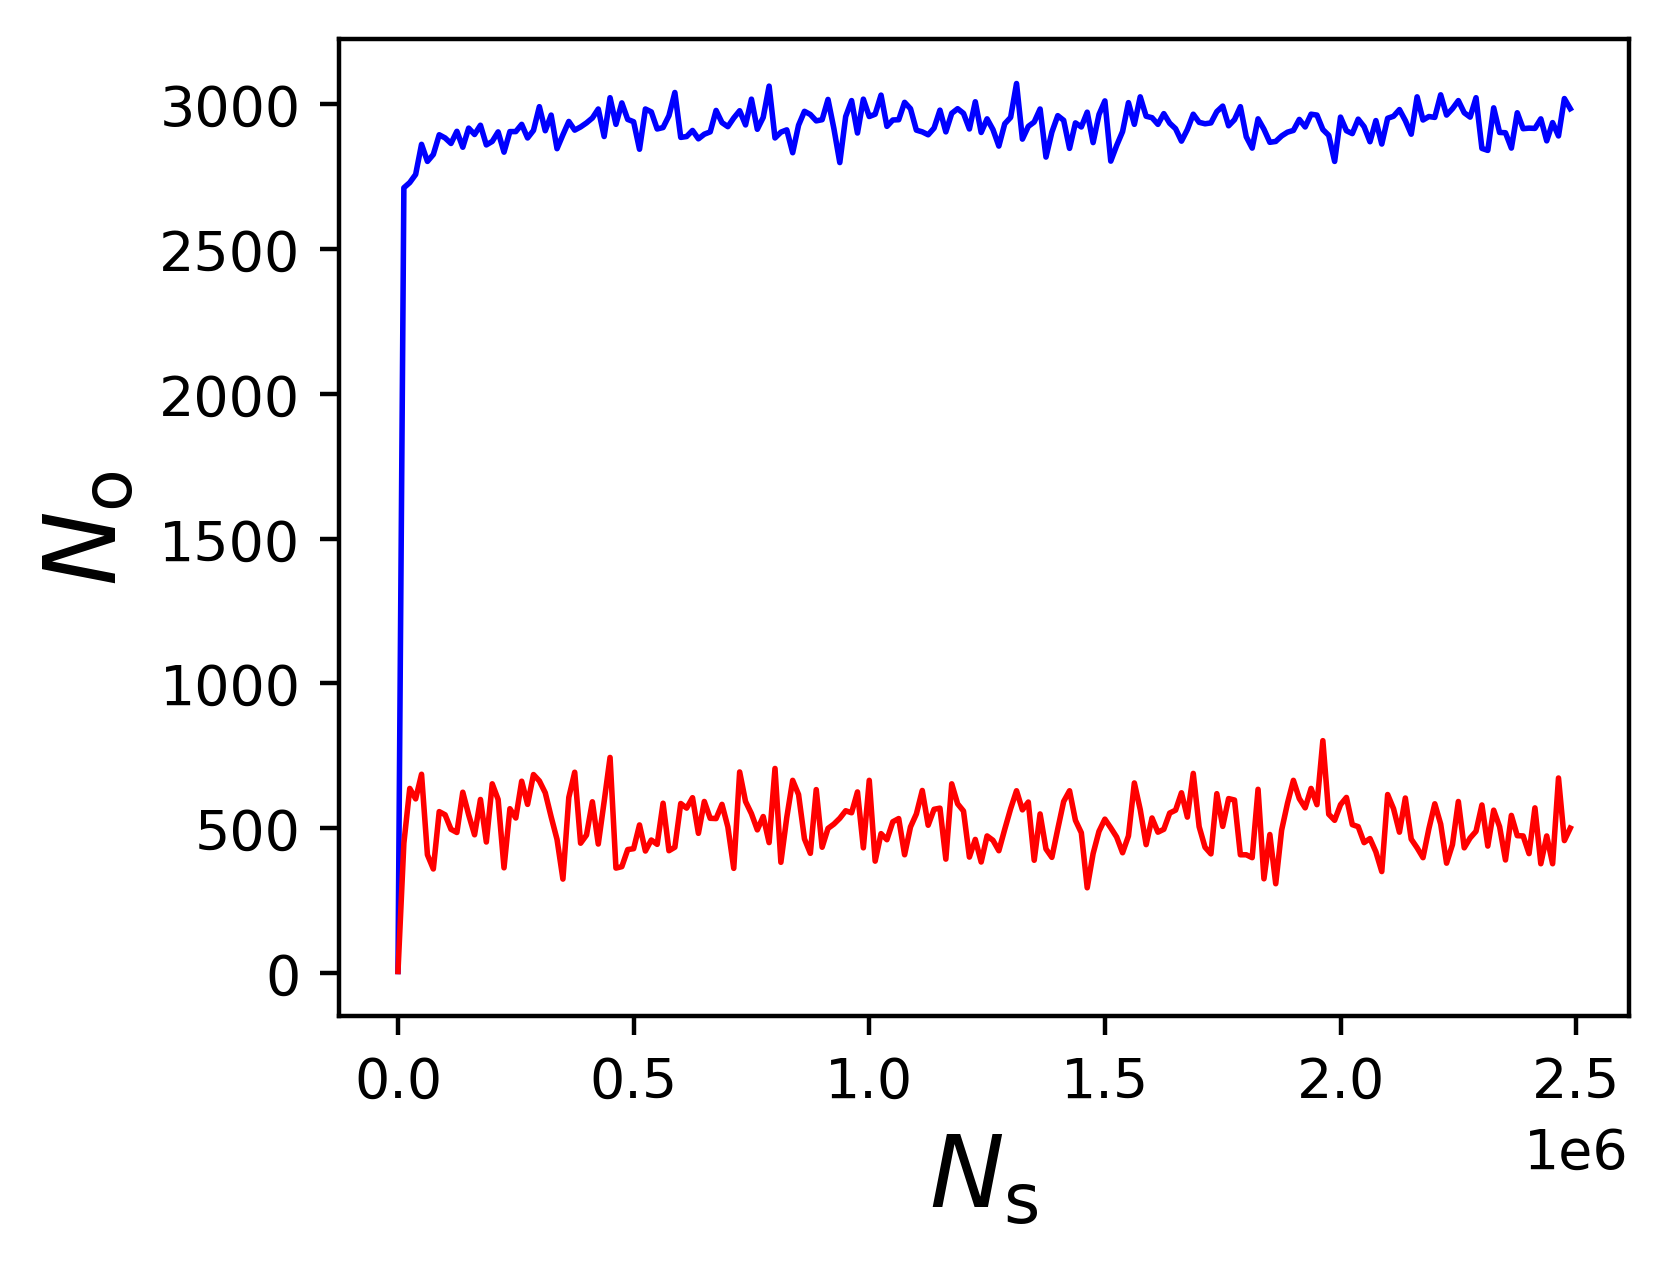

In [9]:
n_samples = 200
steep_display_data = steep_stats[steep_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")
shallow_display_data = shallow_stats[shallow_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")

fig, ax = plt.subplots(figsize=(4, 3), dpi=DPI)

ax.plot(
    steep_display_data.nstat,
    steep_display_data.nobs,
    lw=1.0,
    c="blue"
)

ax.plot(
    shallow_display_data.nstat,
    shallow_display_data.nobs,
    lw=1.0,
    c="red"
)

ax.set_xlabel(r"$N_{\text{s}}$", fontsize=FONT_SIZE)
ax.set_ylabel(r"$N_{\text{o}}$", fontsize=FONT_SIZE)

plt.tight_layout(pad=0.1)
plt.show()

fig.savefig(f"figures/eda_nstat_nobs.{IMAGE_TYPE}")

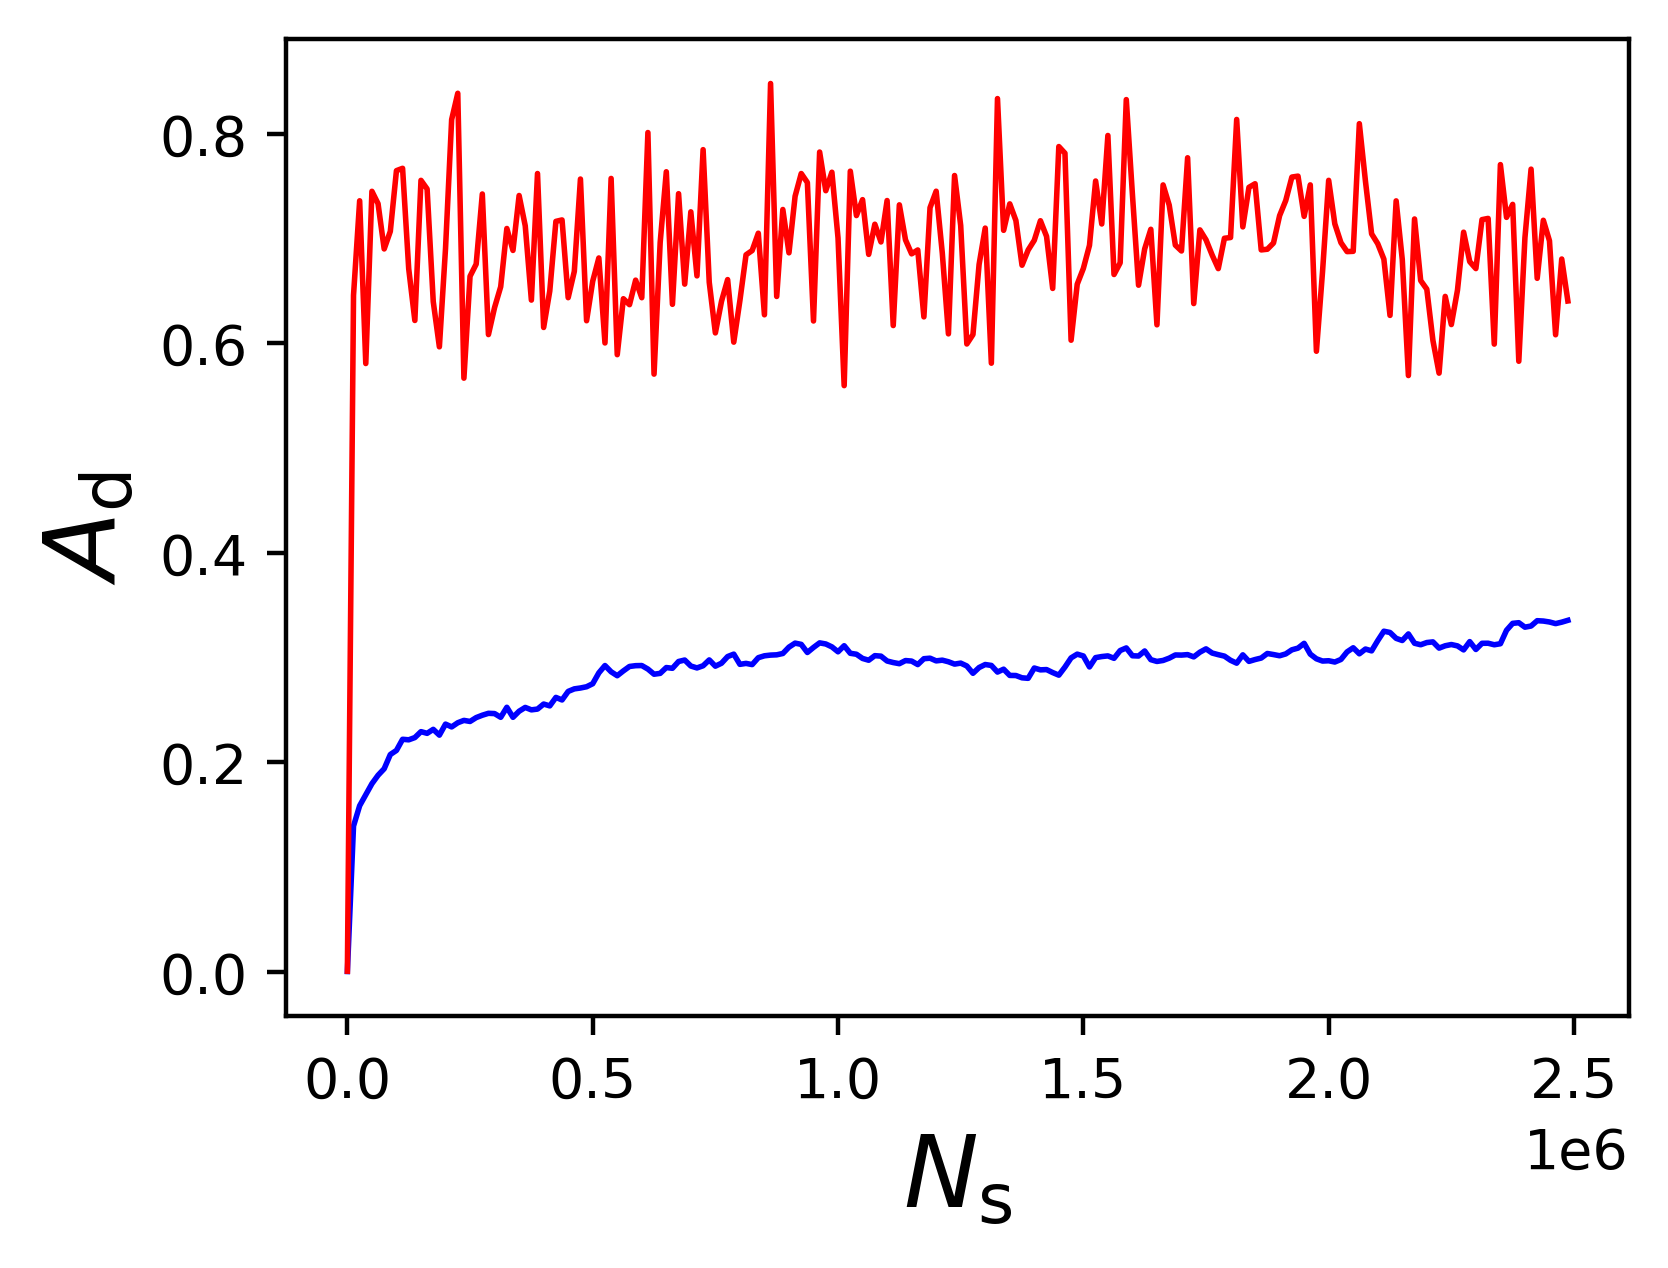

In [10]:
n_samples = 200
steep_display_data = steep_stats[steep_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")
shallow_display_data = shallow_stats[shallow_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")

fig, ax = plt.subplots(figsize=(4, 3), dpi=DPI)

ax.plot(
    steep_display_data.nstat,
    steep_display_data.areal_density,
    lw=1.0,
    c="blue"
)

ax.plot(
    shallow_display_data.nstat,
    shallow_display_data.areal_density,
    lw=1.0,
    c="red"
)

ax.set_xlabel(r"$N_{\text{s}}$", fontsize=FONT_SIZE)
ax.set_ylabel(r"$A_{\text{d}}$", fontsize=FONT_SIZE)

plt.tight_layout(pad=0.1)
plt.show()

fig.savefig(f"figures/eda_nstat_ad.{IMAGE_TYPE}")

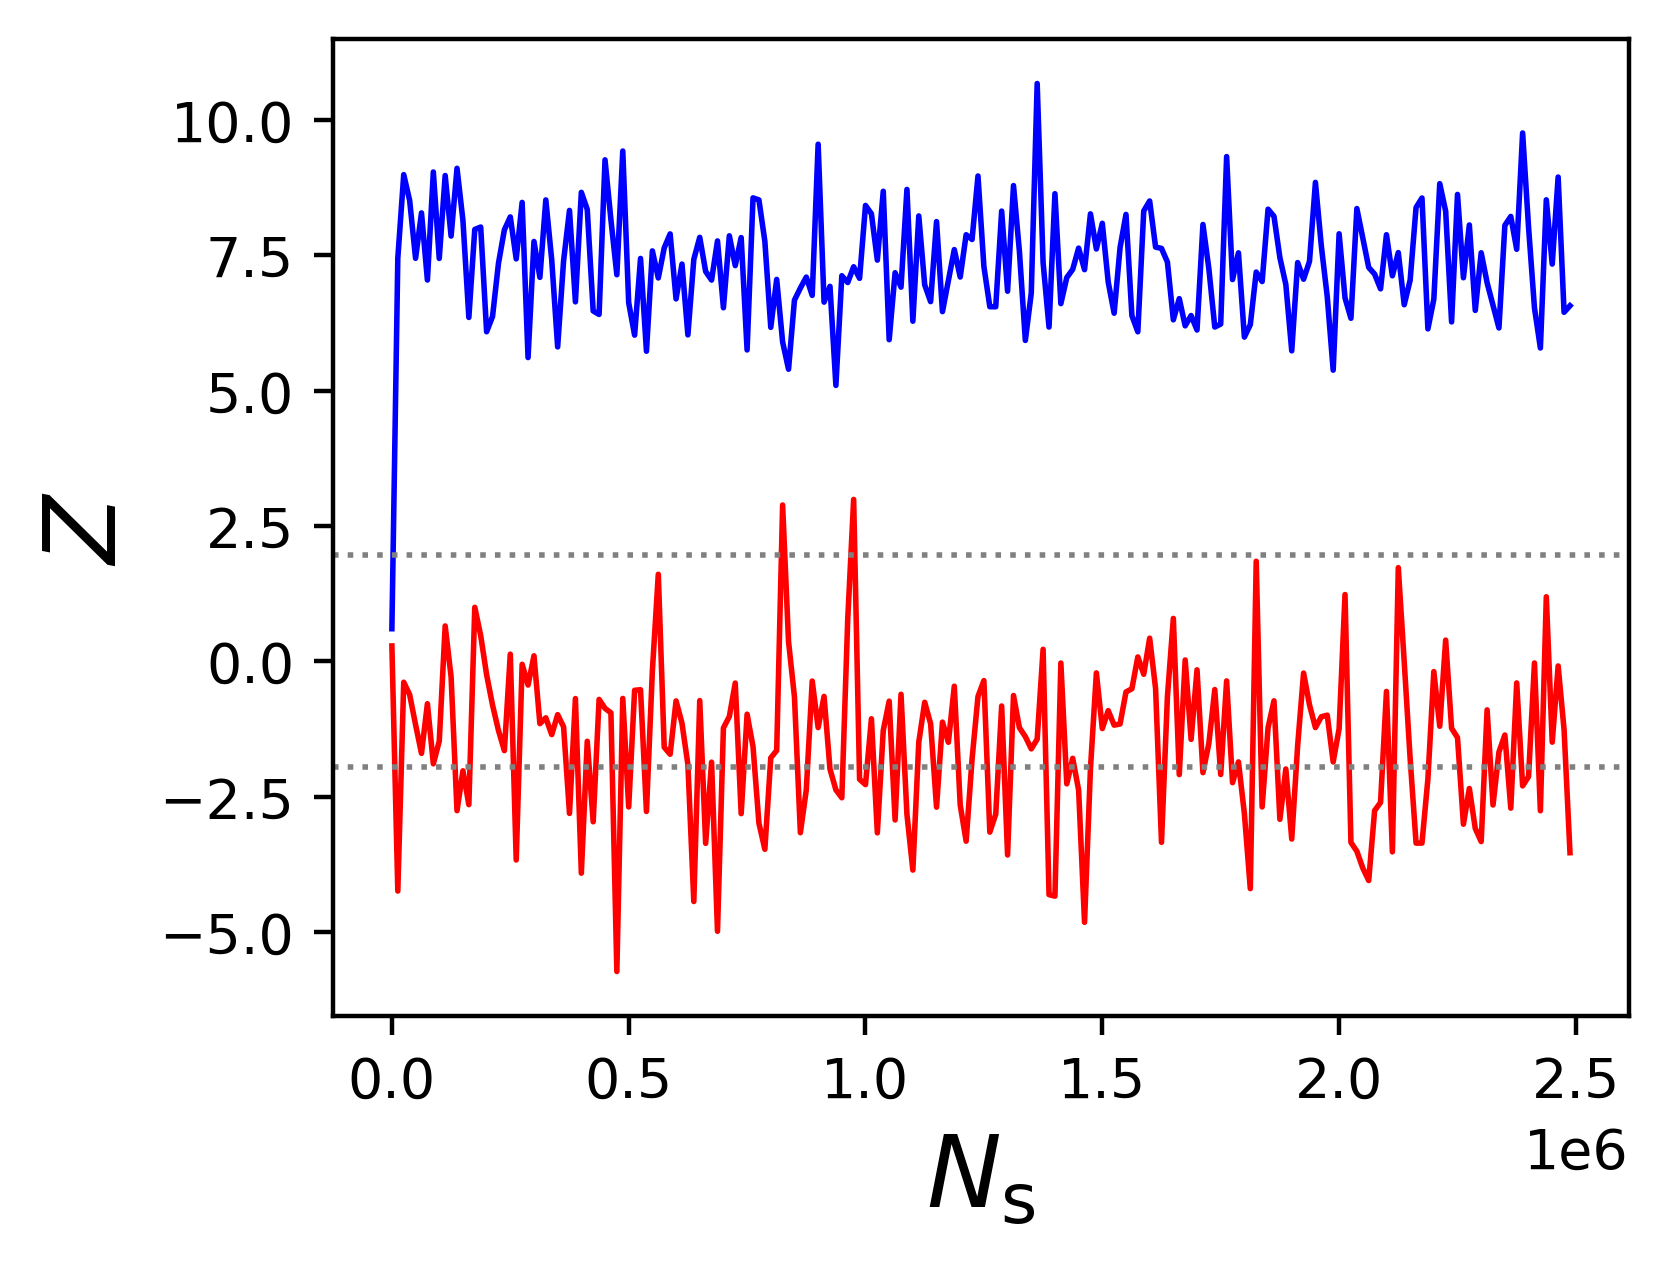

In [11]:
n_samples = 200
steep_display_data = steep_stats[steep_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")
shallow_display_data = shallow_stats[shallow_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")

fig, ax = plt.subplots(figsize=(4, 3), dpi=DPI)

ax.plot(
    steep_display_data.nstat,
    steep_display_data.z,
    lw=1.0,
    c="blue"
)

ax.plot(
    shallow_display_data.nstat,
    shallow_display_data.z,
    lw=1.0,
    c="red"
)

ax.set_xlabel(r"$N_{\text{s}}$", fontsize=FONT_SIZE)
ax.set_ylabel(r"$Z$", fontsize=FONT_SIZE)

# Add dotted reference lines at ±1.96
ax.axhline(y=1.96, color='gray', linestyle=':', linewidth=1)
ax.axhline(y=-1.96, color='gray', linestyle=':', linewidth=1)

plt.tight_layout(pad=0.1)
plt.show()

fig.savefig(f"figures/eda_nstat_z.{IMAGE_TYPE}")

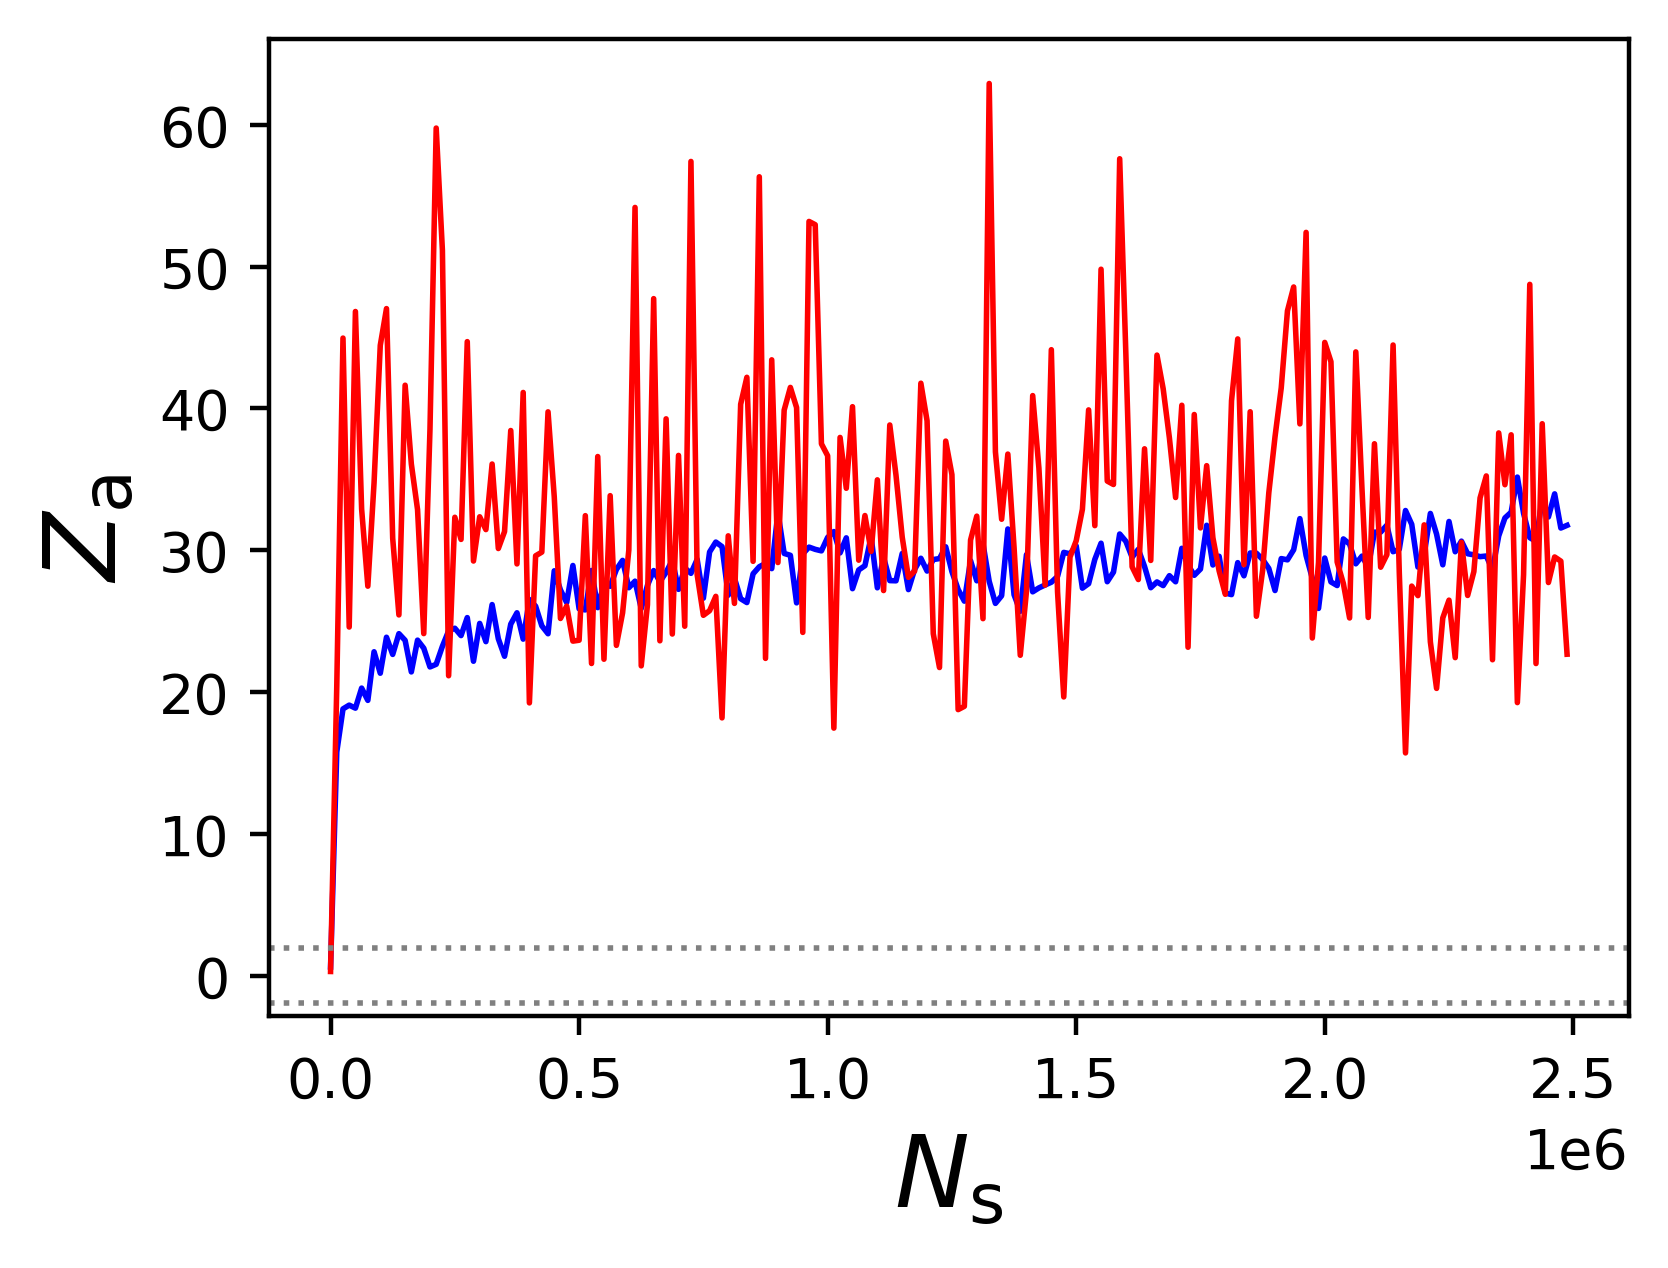

In [12]:
n_samples = 200
steep_display_data = steep_stats[steep_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")
shallow_display_data = shallow_stats[shallow_stats.nstat % (MAX_NSTAT // n_samples) == 5].sort_values("nstat")

fig, ax = plt.subplots(figsize=(4, 3), dpi=DPI)

ax.plot(
    steep_display_data.nstat,
    steep_display_data.za,
    lw=1.0,
    c="blue"
)

ax.plot(
    shallow_display_data.nstat,
    shallow_display_data.za,
    lw=1.0,
    c="red"
)

ax.set_xlabel(r"$N_{\text{s}}$", fontsize=FONT_SIZE)
ax.set_ylabel(r"$Z_{\text{a}}$", fontsize=FONT_SIZE)

# Add dotted reference lines at ±1.96
ax.axhline(y=1.96, color='gray', linestyle=':', linewidth=1)
ax.axhline(y=-1.96, color='gray', linestyle=':', linewidth=1)

plt.tight_layout(pad=0.1)
plt.show()

fig.savefig(f"figures/eda_nstat_za.{IMAGE_TYPE}")

## CSFD plots

### Overall SFD plot, steep

In [13]:
NSTATS = [
    int(1e3),
    int(2.5e5),
    int(2.5e6),
]

In [14]:
stats_df = spark.read.parquet(f"{BASE_PATH}/{steep_simulation_id}/statistics_*.parquet")
craters_df = spark.read.parquet( f"{BASE_PATH}/{steep_simulation_id}/craters_*.parquet")
removals_df = spark.read.parquet(f"{BASE_PATH}/{steep_simulation_id}/crater_removals_*.parquet")

states = get_states(
    stats_df=stats_df,
    craters_df=craters_df,
    removals_df=removals_df,
    nstats=NSTATS,
    study_region_size=study_region_size,
    study_region_padding=study_region_padding,
    spark=spark,
    result_columns=["crater_id", "radius", "nstat"],
)
states.set_index("nstat", inplace=True)

In [15]:
radii_by_nstat = {
    x: states.loc[x].radius.sort_values()
    for x in states.index
}

In [16]:
mle_slope, sigma = estimate_cumulative_slope(
    radii=states.loc[max(NSTATS)].radius,
    rmin=configs_dict[steep_simulation_id]["rstat"],
    rmax=configs_dict[steep_simulation_id]["rmax"],
    min_search_slope=-10.0,
    max_search_slope=-1
)

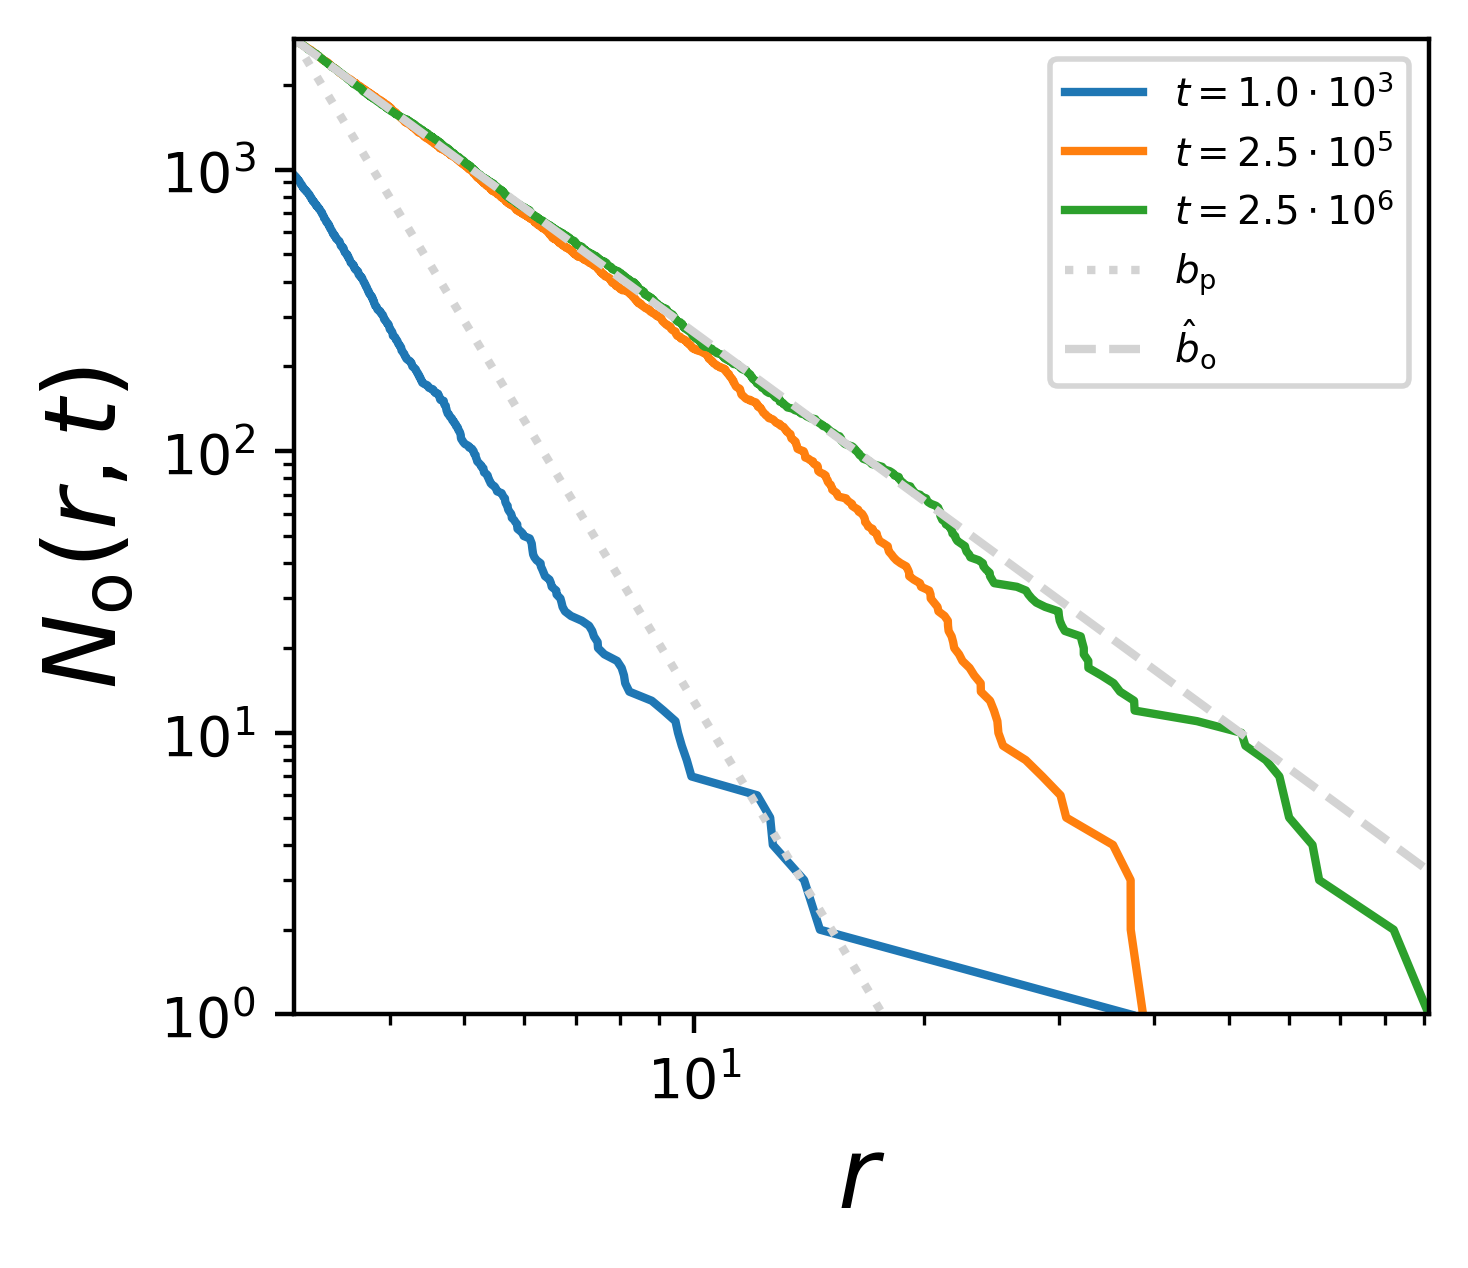

In [17]:
all_radii = states.radius.sort_values()
max_nobs = max(x.shape[0] for x in radii_by_nstat.values())
min_r_ref = all_radii.min()
b_p = configs_dict[steep_simulation_id]["slope"]

fig = plt.figure(figsize=(3.5, 3), dpi=DPI)
ax = fig.add_subplot(111)

for nstat in NSTATS:
    radii = radii_by_nstat[nstat]
    nobs = range(len(radii), 0, -1)
    ax.plot(radii, nobs, label=f"$t={get_scientific_notation(nstat, 1)}$")

# Reference lines for production vs MLE estimated slope
x_ref = np.logspace(np.log10(all_radii.min()), np.log10(all_radii.max()), 100)

reference_lines = {
    b_p: {
        "intercepts": [max_nobs / min_r_ref ** b_p],
        "style": "dotted",
        "label": r"$b_{\text{p}}$"
    },
    mle_slope: {
        "intercepts": [max_nobs / min_r_ref ** mle_slope],
        "style": "dashed",
        "label": r"$\hat{b}_{\text{o}}$"
    }
}

for b_ref, params in reference_lines.items():
    for intercept in params["intercepts"]:
        y_ref = intercept * x_ref**b_ref
        ax.plot(
            x_ref,
            y_ref,
            ls=params["style"],
            color="lightgray",
            label=params["label"],
            lw=1.5
        )

# Set limits based on observed data
ax.set_xlim(all_radii.min(), all_radii.max())
ax.set_ylim(1, max_nobs)

# Labels and scaling
ax.set_xlabel("$r$", fontsize=FONT_SIZE)
ax.set_ylabel(r"$N_{\text{o}}(r, t)$", fontsize=FONT_SIZE)

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc="upper right", fontsize=7)

plt.tight_layout(pad=0.1)
plt.savefig(f"figures/steep_sfd_saturation.{IMAGE_TYPE}")

plt.show()

### Saturated SFDs plot

In [18]:
NSTATS = [
    int(2e6),
    int(2.25e6),
    int(2.5e6),
]

In [19]:
stats_df = spark.read.parquet(f"{BASE_PATH}/{steep_simulation_id}/statistics_*.parquet")
craters_df = spark.read.parquet( f"{BASE_PATH}/{steep_simulation_id}/craters_*.parquet")
removals_df = spark.read.parquet(f"{BASE_PATH}/{steep_simulation_id}/crater_removals_*.parquet")

states = get_states(
    stats_df=stats_df,
    craters_df=craters_df,
    removals_df=removals_df,
    nstats=NSTATS,
    study_region_size=study_region_size,
    study_region_padding=study_region_padding,
    spark=spark,
    result_columns=["crater_id", "radius", "nstat"],
)
states.set_index("nstat", inplace=True)

In [20]:
radii_by_nstat = {
    x: states.loc[x].radius.sort_values()
    for x in states.index
}

In [21]:
mle_slope, sigma = estimate_cumulative_slope(
    radii=states.loc[max(NSTATS)].radius,
    rmin=configs_dict[steep_simulation_id]["rstat"],
    rmax=configs_dict[steep_simulation_id]["rmax"],
    min_search_slope=-10.0,
    max_search_slope=-1
)

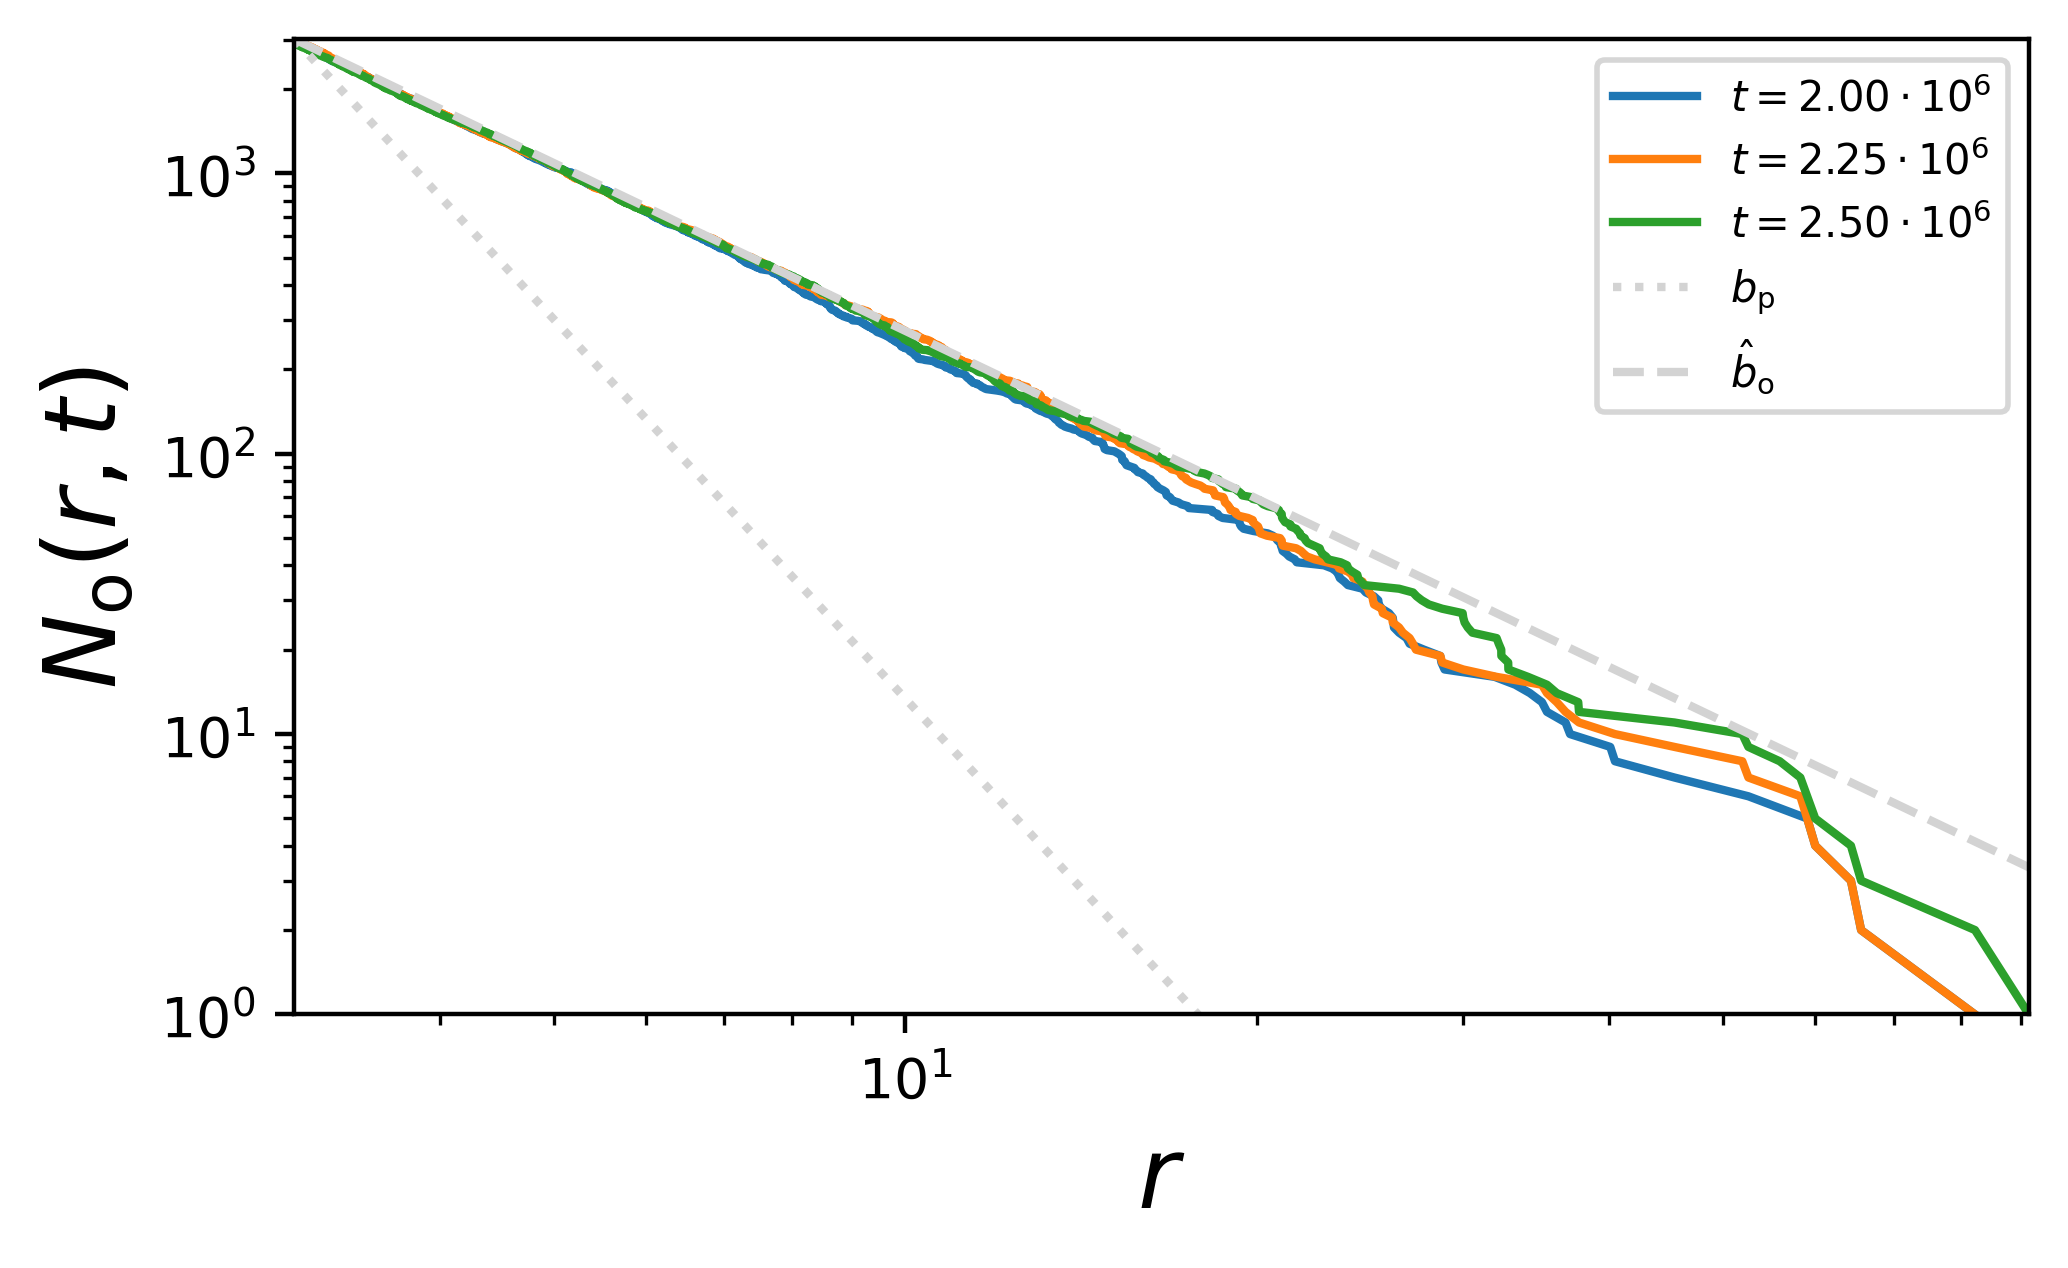

In [22]:
all_radii = states.radius.sort_values()
max_nobs = max(x.shape[0] for x in radii_by_nstat.values())
min_r_ref = all_radii.min()
b_p = configs_dict[steep_simulation_id]["slope"]

fig = plt.figure(figsize=(5, 3), dpi=DPI)
ax = fig.add_subplot(111)

for nstat in NSTATS:
    radii = radii_by_nstat[nstat]
    nobs = range(len(radii), 0, -1)
    ax.plot(radii, nobs, label=f"$t={get_scientific_notation(nstat, 2)}$")

# Reference lines for production vs MLE estimated slope
x_ref = np.logspace(np.log10(all_radii.min()), np.log10(all_radii.max()), 100)

reference_lines = {
    b_p: {
        "intercepts": [max_nobs / min_r_ref ** b_p],
        "style": "dotted",
        "label": r"$b_{\text{p}}$"
    },
    mle_slope: {
        "intercepts": [max_nobs / min_r_ref ** mle_slope],
        "style": "dashed",
        "label": r"$\hat{b}_{\text{o}}$"
    }
}

for b_ref, params in reference_lines.items():
    for intercept in params["intercepts"]:
        y_ref = intercept * x_ref**b_ref
        ax.plot(
            x_ref,
            y_ref,
            ls=params["style"],
            color="lightgray",
            label=params["label"],
            lw=1.5
        )

# Set limits based on observed data
ax.set_xlim(all_radii.min(), all_radii.max())
ax.set_ylim(1, max_nobs)

# Labels and scaling
ax.set_xlabel("$r$", fontsize=FONT_SIZE)
ax.set_ylabel(r"$N_{\text{o}}(r, t)$", fontsize=FONT_SIZE)

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc="upper right", fontsize=7.5)

plt.tight_layout(pad=0.1)
plt.savefig(f"figures/steep_sfd_saturation_after_2m.{IMAGE_TYPE}")

plt.show()

## Shallow-sloped

In [23]:
NSTATS = [
    int(1e3),
    int(2.5e5),
    int(2.5e6),
]

In [24]:
stats_df = spark.read.parquet(f"{BASE_PATH}/{shallow_simulation_id}/statistics_*.parquet")
craters_df = spark.read.parquet( f"{BASE_PATH}/{shallow_simulation_id}/craters_*.parquet")
removals_df = spark.read.parquet(f"{BASE_PATH}/{shallow_simulation_id}/crater_removals_*.parquet")

states = get_states(
    stats_df=stats_df,
    craters_df=craters_df,
    removals_df=removals_df,
    nstats=NSTATS,
    study_region_size=study_region_size,
    study_region_padding=study_region_padding,
    spark=spark,
    result_columns=["crater_id", "radius", "nstat"],
)
states.set_index("nstat", inplace=True)

In [25]:
radii_by_nstat = {
    x: states.loc[x].radius.sort_values()
    for x in states.index
}

In [26]:
mle_slope, sigma = estimate_cumulative_slope(
    radii=states.loc[max(NSTATS)].radius,
    rmin=configs_dict[shallow_simulation_id]["rstat"],
    rmax=configs_dict[shallow_simulation_id]["rmax"],
    min_search_slope=-10.0,
    max_search_slope=-1
)

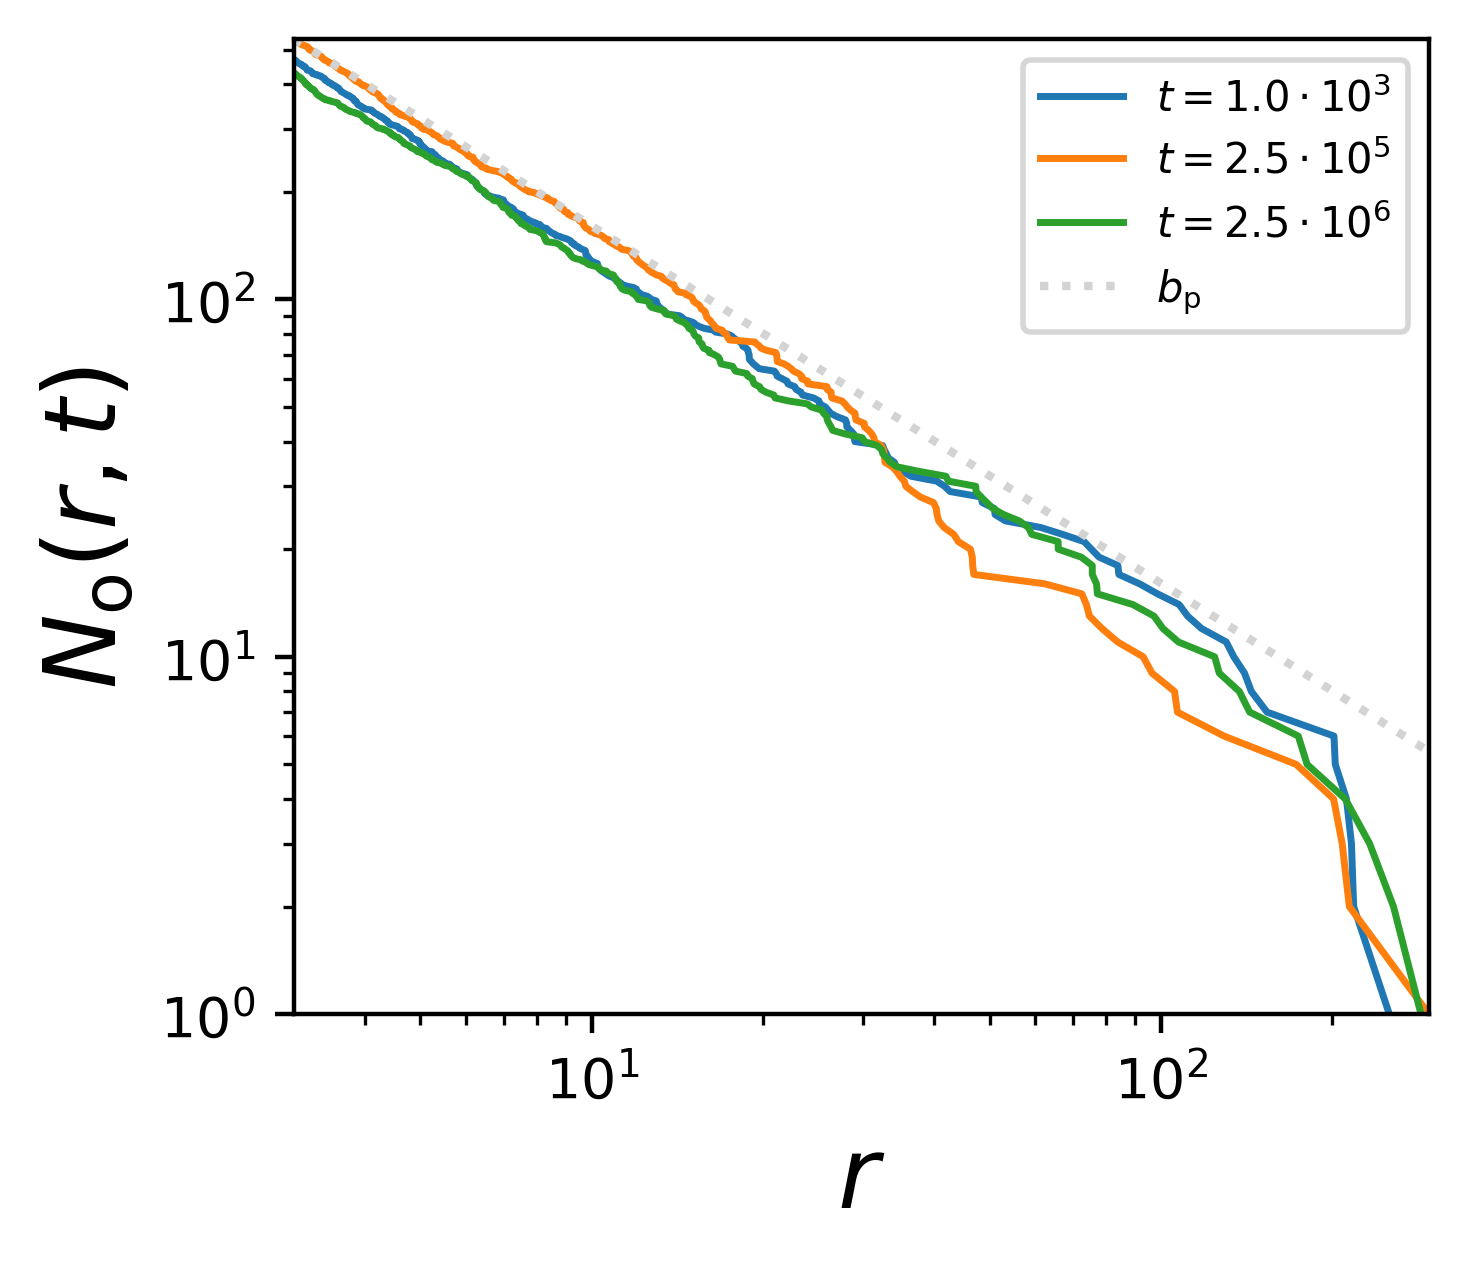

In [27]:
all_radii = states.radius.sort_values()
max_nobs = max(x.shape[0] for x in radii_by_nstat.values())
min_r_ref = all_radii.min()
b_p = configs_dict[shallow_simulation_id]["slope"]

fig = plt.figure(figsize=(3.5, 3), dpi=DPI)
ax = fig.add_subplot(111)

for nstat in NSTATS:
    radii = radii_by_nstat[nstat]
    nobs = range(len(radii), 0, -1)
    ax.plot(radii, nobs, label=f"$t={get_scientific_notation(nstat, 1)}$", lw=1.25)

# Reference lines for production vs MLE estimated slope
x_ref = np.logspace(np.log10(all_radii.min()), np.log10(all_radii.max()), 100)

reference_lines = {
    mle_slope: {
        "intercepts": [max_nobs / min_r_ref ** mle_slope],
        "style": "dashed",
        "label": r"$\hat{b}_{\text{o}}$"
    },
    b_p: {
        "intercepts": [max_nobs / min_r_ref ** b_p],
        "style": "dotted",
        "label": r"$b_{\text{p}}$"
    },
}

for b_ref, params in reference_lines.items():
    for intercept in params["intercepts"]:
        y_ref = intercept * x_ref**b_ref
        ax.plot(
            x_ref,
            y_ref,
            ls=params["style"],
            color="lightgray",
            label=params["label"],
            lw=1.5
        )

# Set limits based on observed data
ax.set_xlim(all_radii.min(), all_radii.max())
ax.set_ylim(1, max_nobs)

# Labels and scaling
ax.set_xlabel("$r$", fontsize=FONT_SIZE)
ax.set_ylabel(r"$N_{\text{o}}(r, t)$", fontsize=FONT_SIZE)

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc="upper right", fontsize=7.5)

plt.tight_layout(pad=0.1)
plt.savefig(f"figures/shallow_sfd_saturation.{IMAGE_TYPE}")

plt.show()